## Analysis of the IT job market on the wuzzuf.com Egyptian  through web scraping and data visualization


## Web Scraping and Data Collection
This part of the database includes primary data sourced from a website using web scraping techniques. The collected data is then stored in a specific format to understand labor market trends.


In [35]:
import requests               # Import library to send HTTP requests to fetch web pages
from bs4 import BeautifulSoup # Import library to parse and extract data from HTML pages
import csv                    # Import library to work with CSV files (to save structured data)
import time                   # Import library to add delays (wait times)
import pandas as pd           # Import data analysis library (used later for data analysis)
import matplotlib.pyplot as plt # Import plotting library for creating graphs
import seaborn as sns          # Import advanced plotting library for statistical data visualization

# Optional: Set font for plots to support Arabic characters if needed
plt.rcParams['font.family'] = 'Arial'

# Base URL for job search on Wuzzuf, searching for "IT" jobs, starting at page 0
base_url = "https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start="
page = 0  # Start from the first page (page index 0)

# Open a new CSV file named "wuzzuf_jobs.csv" for writing with UTF-8 encoding (to support Arabic)
with open("wuzzuf_jobs.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)  # Create a CSV writer object to write data rows into the file
    # Write the header row with column names
    writer.writerow(["Job Title", "Company Name", "Job Type", "Experience"])

    while True:  # Infinite loop to keep fetching pages until no more jobs are found
        url = base_url + str(page)  # Construct the current page URL by appending the page number
        print(f"Fetching page: {url}")  # Print the URL being fetched (for tracking progress)
        response = requests.get(url)  # Send an HTTP GET request to fetch the page content
        soup = BeautifulSoup(response.content, "html.parser")  # Parse the HTML content with BeautifulSoup

        # Find all job containers in the page by looking for divs with specific class
        containers = soup.find_all("div", {"class": "css-1gatmva"})

        # If no job containers found, we've reached the end of the listings
        if not containers:
            print(" No more jobs, raffle closed.")  # Notify that no more jobs are available
            break  # Exit the loop and stop fetching more pages

        # Loop through each job container on the current page
        for container in containers:
            try:
                # Extract job title element and get its text, or assign "N/A" if not found
                job_title_elem = container.find("h2", {"class": "css-m604qf"})
                job_title = job_title_elem.text.strip() if job_title_elem else "N/A"

                # Extract company name element and get its text, or assign "N/A" if not found
                company_elem = container.find("a", {"class": "css-17s97q8"})
                company_name = company_elem.text.strip() if company_elem else "N/A"

                # Extract job type element (e.g., full-time, part-time) or assign "N/A"
                job_type_elem = container.find("div", {"class": "css-1lh32fc"})
                job_type = job_type_elem.text.strip() if job_type_elem else "N/A"

                # Initialize experience as "N/A" in case not found
                experience = "N/A"
                details_div = container.find("div", {"class": "css-y4udm8"})
                if details_div:
                    spans = details_div.find_all("span")
                    # Look for span text containing "Yrs of Exp" or "Experience"
                    for span in spans:
                        if "Yrs of Exp" in span.text or "Experience" in span.text:
                            experience = span.text.strip()
                            break  # Stop searching after finding experience info

                # Write extracted job data as a row in the CSV file
                writer.writerow([job_title, company_name, job_type, experience])

            except Exception as e:  # Catch and print any errors during parsing
                print("Error parsing job:", e)

        page += 10  # Increment page by 10 to move to the next page (pagination step)
        time.sleep(1)  # Pause for 1 second before next request to avoid overloading the server



Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=0
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=10
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=20
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=30
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=40
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=50
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=60
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=70
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=80
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=90
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=100
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=110
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=120
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&start=130
Fetching page: https://wuzzuf.net/search/jobs/?a=hpb&q=IT&s

## 2.Exploratory Data Analysis

## Data saving and analysis
In this section, we save the collected job data to a CSV file and then load it with Pandas for further cleaning, transformation, and visualization. This step is essential for exploring trends, patterns, and insights derived from labor market data.

In [36]:
df = pd.read_csv("wuzzuf_jobs.csv")  # Load the scraped job data from the CSV file into a DataFrame
df.head()  # Display the first few rows of the DataFrame to get a quick overview of the data


,Job Title,Company Name,Job Type,Experience
0,IT Support Specialist,Safety Point -,Full TimeOn-site,· 4 - 6 Yrs of Exp
1,IT Specialist- Sheikh Zayed,Intouch CX -,Full TimeOn-site,· 1 - 3 Yrs of Exp
2,It Service Desk Specialist,Erada -,Full TimeOn-site,· 2 - 4 Yrs of Exp
3,IT Operations Engineer,Halwani Bros -,Full TimeOn-site,· 1 - 2 Yrs of Exp
4,IT Technician,Egypt Education Platform -,Full TimeOn-site,· 1 - 3 Yrs of Exp


## Extract years of experience
In this step, we extract the numerical value of the years of experience required for each job.

In [42]:
def extract_years(exp):
    try:
        if pd.isna(exp) or exp == "N/A":  # Check if experience is missing or not available
            return 0
        for part in exp.split():  # Split the text and look for numeric parts
            if part.isdigit():
                return int(part)  # Return the first number found as years of experience
    except:
        return 0  # In case of any error, return 0
    return 0  # Default return if no number found

# Apply the function to the 'Experience' column to create a new numeric 'Experience_Years' column
df["Experience_Years"] = df["Experience"].apply(extract_years)

## Check for missing or unknown values

In [51]:
# Print the count of missing (null) values in each column of the DataFrame
print(df.isnull().sum())

# Print the number of rows where the 'Job Title' column has the value 'N/A'
print(df[df['Job Title'] == 'N/A'].shape)

# Print the number of rows where the 'Company Name' column has the value 'N/A'
print(df[df['Company Name'] == 'N/A'].shape)

# Print the number of rows where the 'Experience' column has the value 'N/A'
print(df[df['Experience'] == 'N/A'].shape)


Job Title            0
Company Name         0
Job Type             0
Experience          27
Experience_Years     0
Exp_Group            0
dtype: int64
(0, 6)
(0, 6)
(0, 6)


## Histogram of years of experience distribution

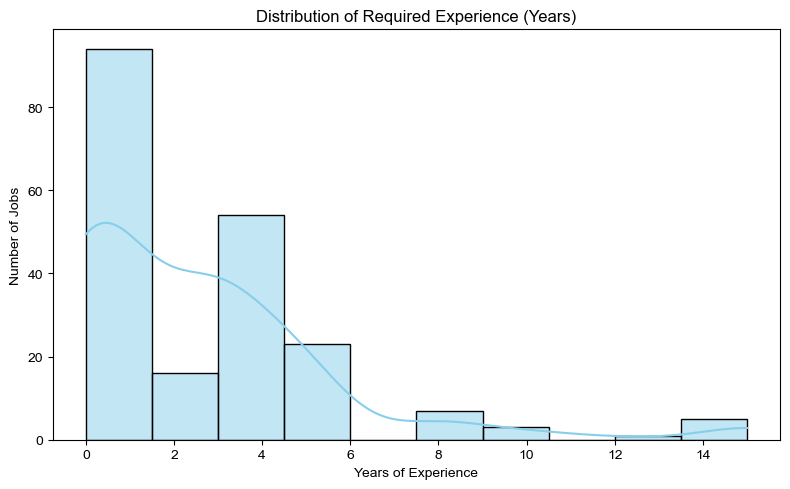

In [49]:
# Create a new figure with size 8x5 inches
plt.figure(figsize=(8,5))

# Plot a histogram of the "Experience_Years" column with 10 bins and a KDE curve, using skyblue color
sns.histplot(df["Experience_Years"], bins=10, kde=True, color='skyblue')

# Add a title to the plot
plt.title("Distribution of Required Experience (Years)")

# Label the x-axis
plt.xlabel("Years of Experience")

# Label the y-axis
plt.ylabel("Number of Jobs")

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


## Boxplot: Job Type vs. Experience

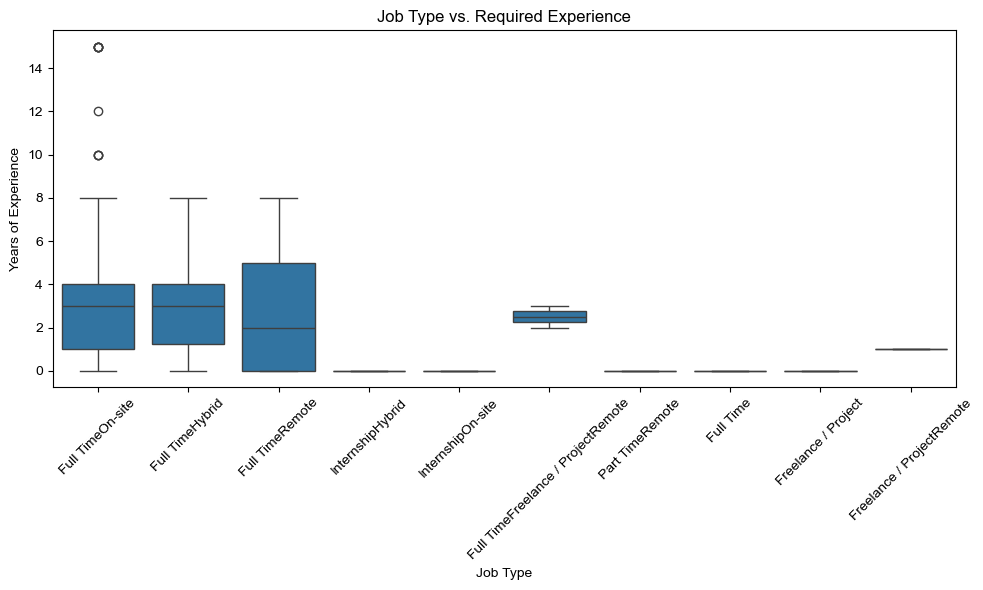

In [48]:
# Set the figure size to make the plot clearer and more readable
plt.figure(figsize=(10,6))

# Create a boxplot to visualize the distribution of required experience for each job type
sns.boxplot(x="Job Type", y="Experience_Years", data=df)

# Set the title of the plot
plt.title("Job Type vs. Required Experience")

# Label the x-axis
plt.xlabel("Job Type")

# Label the y-axis
plt.ylabel("Years of Experience")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap and make the plot fit nicely
plt.tight_layout()

# Display the plot
plt.show()



##  Most common job title

In [46]:
# Filter only jobs from top 10 companies
top_company_jobs = df[df["Company Name"].isin(top_companies.index)]

# Create pivot table to count job titles per company
pivot = top_company_jobs.pivot_table(index="Company Name", columns="Job Title", aggfunc="size", fill_value=0)

# Display top 5 rows of the pivot table
print(pivot.head())


Job Title                      AWS / Amazon Connect Specialist  \
Company Name                                                     
Agile Consultants -                                          0   
Confidential -                                               0   
ENGIE Solutions Middle East -                                0   
Genesis A -                                                  0   
ICON Holding -                                               0   

Job Title                      Accounting Manager  Adults Product Manager  \
Company Name                                                                
Agile Consultants -                             0                       0   
Confidential -                                  1                       0   
ENGIE Solutions Middle East -                   0                       0   
Genesis A -                                     0                       0   
ICON Holding -                                  0                       0  

##  3.Data Visualisation

## Number of Jobs by Experience Required
This visualization shows how job opportunities are distributed based on the number of years of experience required. It helps understand the most in-demand experience levels in the job market.

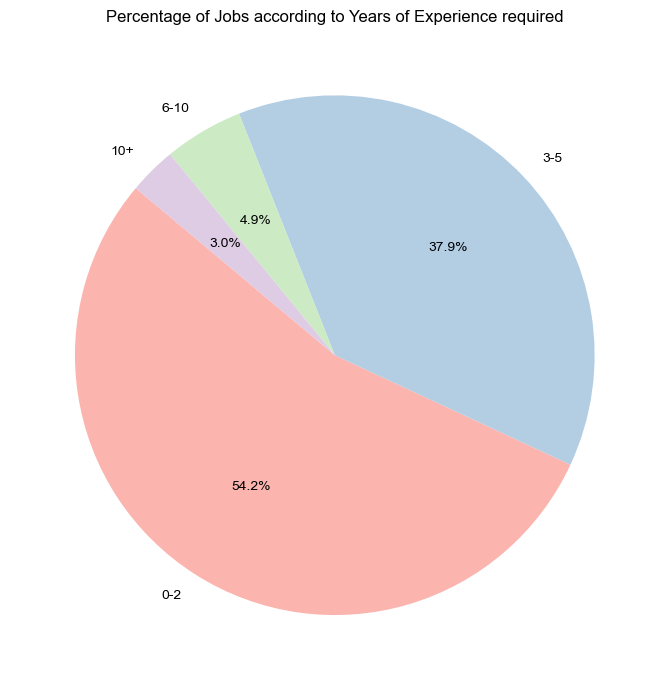

In [38]:
# Step 1: Define experience groups

# Define the bin edges that categorize years of experience into ranges:
# 0–2, 3–5, 6–10, and above 10 (up to 20)
bins = [0, 2, 5, 10, 20]

# Define the corresponding labels for each experience range
labels = ['0-2', '3-5', '6-10', '10+']

# Use pd.cut to divide the 'Experience_Years' column into defined groups
# 'include_lowest=True' ensures values equal to the lowest bin (0) are included
df["Exp_Group"] = pd.cut(df["Experience_Years"], bins=bins, labels=labels, include_lowest=True)

# Step 2: Count values and plot pie chart
exp_counts = df["Exp_Group"].value_counts().sort_index() # Count jobs in each experience group and sort by group order
plt.figure(figsize=(7,7)) # Set the figure size to be square for better pie chart appearance
plt.pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors) # Create a pie chart with labels showing percentages with one decimal and pastel colors
plt.title("Percentage of Jobs according to Years of Experience required")# Add chart title
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()# Display the pie chart


## Top Hiring Companies
This chart highlights the companies with the highest number of job openings. It helps identify the most active employers in the market and the locations where the most opportunities are concentrated.

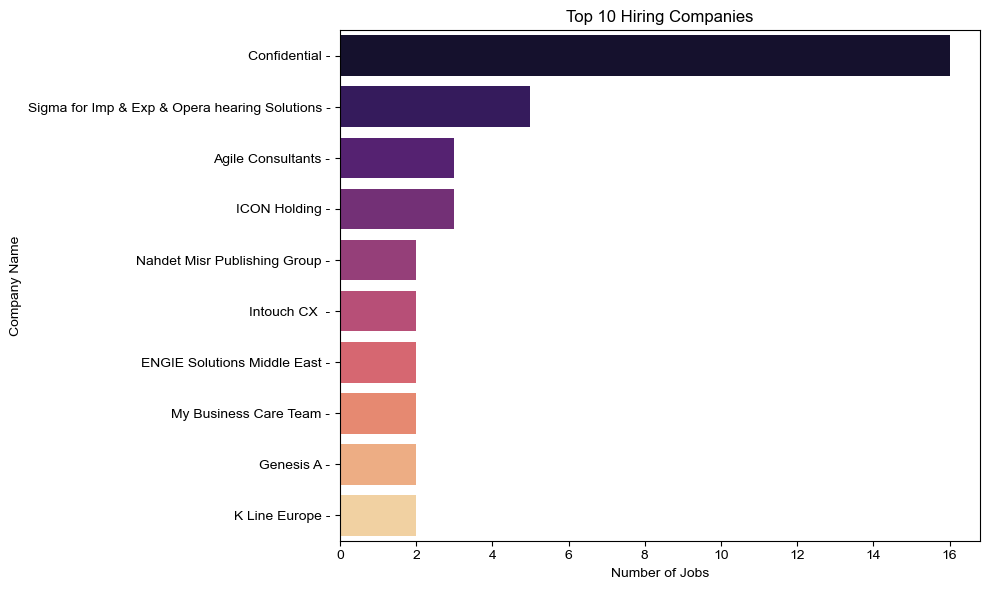

In [39]:
# Count how many job postings each company has, and take the top 10 companies
top_companies = df['Company Name'].value_counts().head(10)

# Set the figure size for better visualization
plt.figure(figsize=(10,6))

# Create a horizontal barplot for the top 10 hiring companies
# x: number of jobs, y: company names, hue used to differentiate bars by company name
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index, palette="magma", legend=False)

# Set the title and axis labels
plt.title("Top 10 Hiring Companies")
plt.xlabel("Number of Jobs")
plt.ylabel("Company Name")

# Adjust layout to avoid overlap and make it look clean
plt.tight_layout()

# Show the plot
plt.show()


## Most Common Job Titles
This analysis displays the most frequently appearing job titles in the dataset, illustrating the roles that are most in demand in the job market.

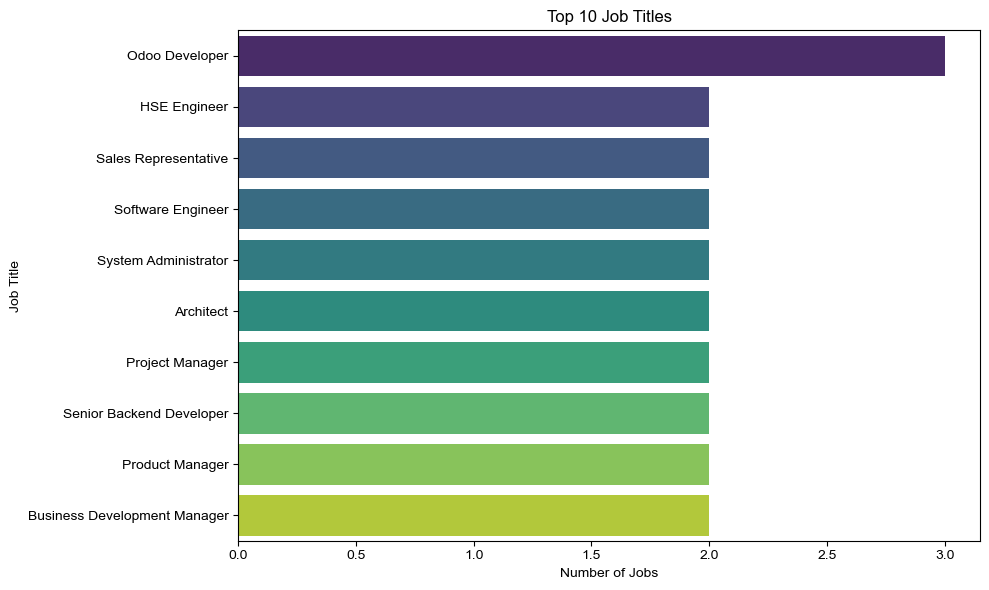

In [40]:
# Count how many times each job title appears, and take the top 10 most common titles
top_jobs = df['Job Title'].value_counts().head(10)

# Set the figure size for better appearance
plt.figure(figsize=(10,6))

# Create a horizontal barplot showing the top 10 job titles by number of postings
sns.barplot(x=top_jobs.values, y=top_jobs.index, hue=top_jobs.index, palette="viridis", legend=False)

# Add a title and axis labels for context
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Jobs")
plt.ylabel("Job Title")

# Adjust layout to prevent clipping and ensure everything fits nicely
plt.tight_layout()

# Display the plot
plt.show()


## Some analysis by job type
This section explores the distribution of available job listings based on their type (e.g., full-time, part-time, freelance). Understanding this helps determine the prevailing working arrangements in the market.

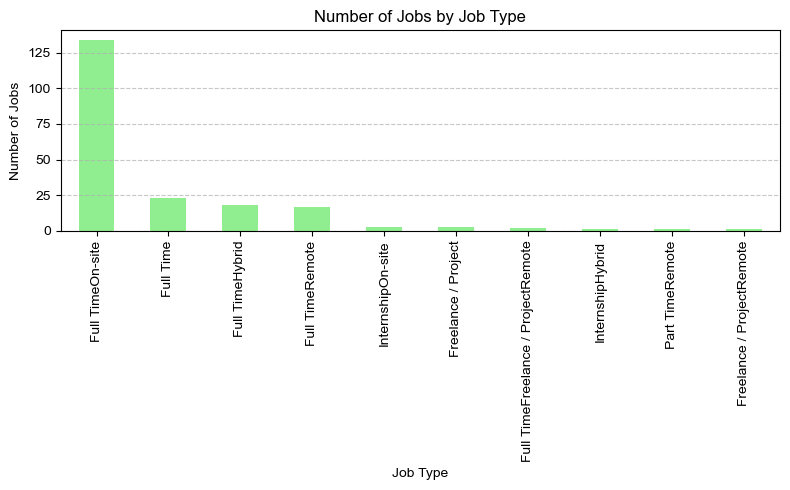

In [41]:
# Set the figure size to make the plot clearer and more readable
plt.figure(figsize=(8,5))

# Count the number of jobs for each job type and create a vertical bar chart
df["Job Type"].value_counts().plot(kind='bar', color='lightgreen')

# Set the title of the chart
plt.title("Number of Jobs by Job Type")

# Label the x-axis to indicate it represents job types
plt.xlabel("Job Type")

# Label the y-axis to indicate it represents the number of jobs
plt.ylabel("Number of Jobs")

# Add horizontal grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Automatically adjust layout to prevent label overlapping
plt.tight_layout()

# Display the bar chart
plt.show()

